### Import Modules

In [2]:
import os
import glob

import pandas as pd
import numpy as np

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [3]:
path = "C:/Users/Vahid/Desktop/Chemnitz/DMC Cup/DMC_2019_task/"

for path_fileName in glob.glob(path + '*.csv'):
    if 'train' in path_fileName:
        Table_Train = pd.read_csv(path_fileName, sep='|')
    elif 'test' in path_fileName:
        Table_Test = pd.read_csv(path_fileName, sep='|')
    else:
        print('No valid Files in this folder')

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]
[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]


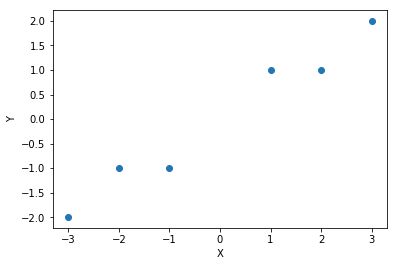

In [4]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(X)
print(distances)
print(indices)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
print('Training Set:')
print(Table_Train.dtypes)
print('Number of rows:', Table_Train.shape[0])
print('Number of columns:', Table_Train.shape[1])
Table_Train.head(3)

Training Set:
trustLevel                     int64
totalScanTimeInSeconds         int64
grandTotal                   float64
lineItemVoids                  int64
scansWithoutRegistration       int64
quantityModifications          int64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
fraud                          int64
dtype: object
Number of rows: 1879
Number of columns: 10


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0


In [6]:
print('Test Set:')
print(Table_Test.dtypes)
print('Number of rows:', Table_Test.shape[0])
print('Number of columns:', Table_Test.shape[1])
Table_Test.head(3)

Test Set:
trustLevel                     int64
totalScanTimeInSeconds         int64
grandTotal                   float64
lineItemVoids                  int64
scansWithoutRegistration       int64
quantityModifications          int64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
dtype: object
Number of rows: 498121
Number of columns: 9


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000


In [7]:
table_train = Table_Train.drop(columns=['fraud'])
table_train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000


In [8]:
Table_Test.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
count,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000
mean,3.503257,915.608772,49.988990,5.495926,5.001281,2.499015,0.068054,0.222182,0.735190
std,1.707662,528.772880,28.873426,3.447683,3.163795,1.708182,0.521092,1.717867,1.320235
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000
25%,2.000000,458.000000,24.930000,3.000000,2.000000,1.000000,0.008682,0.027348,0.160000
50%,4.000000,916.000000,50.030000,5.000000,5.000000,2.000000,0.016940,0.054550,0.352941
75%,5.000000,1374.000000,75.020000,8.000000,8.000000,4.000000,0.033929,0.109091,0.692308
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.710000,11.000000


In [9]:
Table_Train.isnull().values
print(Table_Train.isnull().values.any())
print(Table_Test.isnull().values.any())

False
False


In [10]:
X = Table_Train.values[:, 0:9]
n_features = X.shape[1]
n_samples = X.shape[0]

# the label to predict is the id of the person
y = Table_Train.values[:, 9]
n_classes = len(np.unique(y))

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1879
n_features: 9
n_classes: 2


In [11]:
random_state = np.random.RandomState(0)
X, y = shuffle(X,y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state)

X_train, y_train = shuffle(X_train, y_train)

LoR_classifier = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty='l2', multi_class='ovr', random_state=random_state, tol=0.0001)
LoR_classifier.fit(X_train, y_train)
print('LogisticRegression Accuracy: %.2f' %LoR_classifier.score(X_test, y_test))
y_pred = LoR_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

LinearSVC_classifier = LinearSVC()
LinearSVC_classifier.fit(X_train, y_train)
print('LinearSVC Accuracy: %.2f' %LinearSVC_classifier.score(X_test, y_test))
y_pred = LinearSVC_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

LogisticRegression Accuracy: 0.96
[[527   9]
 [ 13  15]]
LinearSVC Accuracy: 0.95
[[531   5]
 [ 26   2]]


In [25]:
data_feature_name
data_target_name = np.array(['Fraud', 'Non-Fraud'])
data_target_name

array(['Fraud', 'Non-Fraud'], dtype='<U9')

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

data_feature_name = Table_Train.columns[1:][:-1]
data_target_name = np.array(['Fraud', 'Non-Fraud'])
import graphviz
import pydotplus
from IPython.display import Image
dot_tree = tree.export_graphviz(clf,out_file=None,feature_names=data_feature_name,class_names=data_target_name,filled=True, rounded=True,special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_tree)
# img = Image(graph.create_png())

# --------------------- 
# 作者：llh_1178 
# 来源：CSDN 
# 原文：https://blog.csdn.net/llh_1178/article/details/78516774 
# 版权声明：本文为博主原创文章，转载请附上博文链接！

ValueError: Length of feature_names, 8 does not match number of features, 9

In [ ]:
random_state = np.random.RandomState(0)

X_train, X_test, y_train, y_test = train_test_split(
    a, y, test_size=0.25, random_state=random_state)

X_train, y_train = shuffle(X_train, y_train)

LoR_classifier = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty='l2', multi_class='ovr', random_state=random_state, tol=0.0001)
LoR_classifier.fit(X_train, y_train)
print('LogisticRegression Accuracy: %.2f' %LoR_classifier.score(X_test, y_test))

LinearSVC_classifier = LinearSVC(multi_class='ovr')
LinearSVC_classifier.fit(X_train, y_train)
print('LinearSVC Accuracy: %.2f' %LinearSVC_classifier.score(X_test, y_test))

In [ ]:
random_state = np.random.RandomState(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=random_state)

X_train, y_train = shuffle(X_train, y_train)

LoR_classifier = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty='l2', multi_class='ovr', random_state=random_state, tol=0.0001)
LoR_classifier.fit(X_train, y_train)
print('LogisticRegression Accuracy: %.2f' %LoR_classifier.score(X_test, y_test))

SVC_classifier = SVC(probability=True)
SVC_classifier.fit(X_train, y_train)
print('SVC Accuracy: %.2f' %SVC_classifier.score(X_test, y_test))

LinearSVC_classifier = LinearSVC(multi_class='ovr')
LinearSVC_classifier.fit(X_train, y_train)
print('LinearSVC Accuracy: %.2f' %LinearSVC_classifier.score(X_test, y_test))

SGD_classifier = SGDClassifier()
SGD_classifier.fit(X_train, y_train)
print('SGDClassifier Accuracy: %.2f' %SGD_classifier.score(X_test, y_test))

try:
    NuSVC_classifier = NuSVC()
    NuSVC_classifier.fit(X_train, y_train)
    print('NuSVC Accuracy: %.2f' %NuSVC_classifier.score(X_test, y_test))
except:
    pass

try:
    MultinomialNB_classifier = MultinomialNB()
    MultinomialNB_classifier.fit(X_train, y_train)
    print('MultinomialNB Accuracy: %.2f' %MultinomialNB_classifier.score(X_test, y_test))
except:
    pass

try:
    BernoulliNB_classifier = BernoulliNB()
    BernoulliNB_classifier.fit(X_train, y_train)
    print('BernoulliNB Accuracy: %.2f' %BernoulliNB_classifier.score(X_test, y_test))
except:
    pass

try:
    GaussianNB_classifier = GaussianNB()
    GaussianNB_classifier.fit(X_train, y_train)
    print('GaussianNB Accuracy: %.2f' %GaussianNB_classifier.score(X_test, y_test))
except:
    pass

In [ ]:
################################################################################# Confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#############################################################################  Confusion_matrix(y_true, y_pred, labels=None, sample_weight=None) for LogisticRegression

y_pred = LoR_classifier.predict(X_test)
class_names = np.unique(y_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization for LogisticRegression')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for LogisticRegression')

plt.show()

In [ ]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = LoR_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
lw = 2
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from collections import Counter

print(Counter(y).keys())
print(Counter(y).values())

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
model_pca_trans = pca.fit_transform(X_train)
plt.figure(figsize=(20, 10))
label_color_dict = {label:idx for idx, label in enumerate(np.unique(y_train))}
cvec = [label_color_dict[label] for label in y_train]
plt.scatter(model_pca_trans[:, 0], model_pca_trans[:, 1], c=cvec, edgecolor='', alpha=0.2)

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,  learning_rate=1000, init="random", random_state=1234).fit_transform(X_train)
plt.figure(figsize=(20, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cvec, edgecolor='', alpha=0.2)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [ ]:
features = iris.data.T


In [ ]:
features[0]